In [235]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
train = pd.read_csv('banking_direct_marketing_portugal(with_id).csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              41188 non-null  int64  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

In [237]:
import pandas as pd

bins = [17, 30, 40, 50, 60, 70, 120]
labels = ['17-29', '30-39', '40-49', '50-59', '60-69', '70+']

train['age'] = pd.cut(train.age, bins, labels = labels,include_lowest = True)

age = pd.get_dummies(train.age, prefix='age', dtype='int64' )

print(train)
age.head()

          id    age          job  marital            education  default  \
0          1  50-59    housemaid  married             basic.4y       no   
1          2  50-59     services  married          high.school  unknown   
2          3  30-39     services  married          high.school       no   
3          4  30-39       admin.  married             basic.6y       no   
4          5  50-59     services  married          high.school       no   
...      ...    ...          ...      ...                  ...      ...   
41183  41184    70+      retired  married  professional.course       no   
41184  41185  40-49  blue-collar  married  professional.course       no   
41185  41186  50-59      retired  married    university.degree       no   
41186  41187  40-49   technician  married  professional.course       no   
41187  41188    70+      retired  married  professional.course       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0          no   no  telephone

,age_17-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70+
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [238]:
job = pd.get_dummies(train.job, prefix='job', dtype='int64')
job.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [239]:
marital = pd.get_dummies(train.marital, prefix='marital', dtype='int64').iloc[:, 1:]
marital.head()

,marital_married,marital_single,marital_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [240]:
education = pd.get_dummies(train.education, prefix='education', dtype='int64')
education

,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0
41184,0,0,0,0,0,1,0,0
41185,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,1,0,0


In [241]:
default = pd.get_dummies(train.default, prefix='default', dtype='int64')
default.head()

,default_no,default_unknown,default_yes
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [242]:
housing = pd.get_dummies(train.housing, prefix='housing', dtype='int64')
housing.head()

,housing_no,housing_unknown,housing_yes
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [243]:
loan = pd.get_dummies(train.loan, prefix='loan', dtype='int64')
loan.head()

,loan_no,loan_unknown,loan_yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [244]:
contact = pd.get_dummies(train.contact, prefix='contact', dtype='int64')
contact.head()

,contact_cellular,contact_telephone
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [245]:
month = pd.get_dummies(train.month, prefix='month', dtype='int64')
month.head()

,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [246]:
day_of_week = pd.get_dummies(train.day_of_week, prefix='day_of_week', dtype='int64')
day_of_week.head()

,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [247]:
poutcome = pd.get_dummies(train.poutcome, prefix='poutcome', dtype='int64')
poutcome.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [248]:
y = pd.get_dummies(train.y, prefix='y', dtype='int64')
y.head()

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [249]:
# train['duration'] = train[train['duration']>258]
(train['duration']).where((train['duration'] < 258),1,-1)


train.where(train['duration'] > 258, 1)

# train['duration'] = np.where(train['duration']>258,1,-1)
# train.head()
# train['duration'] = pd.rename(columns = {'duration':'duration'}, inplace = True)
print(train.duration)

ValueError: For argument "inplace" expected type bool, received type int.

In [278]:
train = pd.concat([train, age, job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome], axis=1)
train.head()
train.to_csv('feature-selection-train.csv')

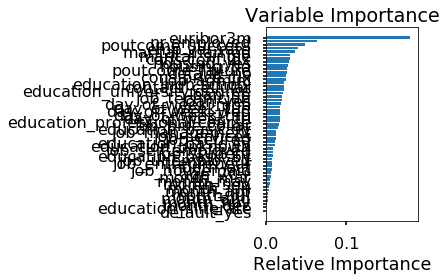

In [251]:
features = np.array(['age_70+', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'contact_cellular', 'poutcome_failure', 'poutcome_success', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'loan_no', 'loan_yes'])

clf = RandomForestClassifier()
clf.fit(train[features], train['y'])

importances = clf.feature_importances_
sorted_idx = np.argsort(importances)
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.style.use('seaborn-poster')
plt.tight_layout()
plt.savefig('features.jpg')
plt.show()

In [252]:
plt.savefig('feature_selection_banking_direct_marketing.png')

<Figure size 921.6x633.6 with 0 Axes>

In [253]:
X = train.loc[:, features]
X.shape

(41188, 51)

In [254]:
Y = train.y
Y.shape

(41188,)

In [255]:
Y_pred = clf.predict(X)
print('Correctly predicted on TRAINING SET: {}, errors:{}'.format(
    sum(Y == Y_pred), sum(Y != Y_pred)))

Correctly predicted on TRAINING SET: 39763, errors:1425


In [256]:
print(classification_report(Y, Y_pred))
print('Accuracy on TRAINING set: {:.2f}'.format(accuracy_score(Y, Y_pred)))

              precision    recall  f1-score   support

          no       0.97      1.00      0.98     36548
         yes       0.95      0.73      0.83      4640

    accuracy                           0.97     41188
   macro avg       0.96      0.86      0.90     41188
weighted avg       0.96      0.97      0.96     41188

Accuracy on TRAINING set: 0.97


In [257]:
test = pd.read_csv('bank-additional.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   contact         4119 non-null   object 
 9   month           4119 non-null   object 
 10  day_of_week     4119 non-null   object 
 11  duration        4119 non-null   int64  
 12  campaign        4119 non-null   int64  
 13  pdays           4119 non-null   int64  
 14  previous        4119 non-null   int64  
 15  poutcome        4119 non-null   object 
 16  emp.var.rate    4119 non-null   float64
 17  cons.price.idx  4119 non-null   f

In [258]:
bins = [17, 30, 40, 50, 60, 70, 120]
labels = ['17-29', '30-39', '40-49', '50-59', '60-69', '70+']

test['age'] = pd.cut(test.age, bins, labels = labels,include_lowest = True)

age = pd.get_dummies(test.age, prefix='age', dtype='int64' )

print(train)
age.head()

          id    age          job  marital            education  default  \
0          1  50-59    housemaid  married             basic.4y       no   
1          2  50-59     services  married          high.school  unknown   
2          3  30-39     services  married          high.school       no   
3          4  30-39       admin.  married             basic.6y       no   
4          5  50-59     services  married          high.school       no   
...      ...    ...          ...      ...                  ...      ...   
41183  41184    70+      retired  married  professional.course       no   
41184  41185  40-49  blue-collar  married  professional.course       no   
41185  41186  50-59      retired  married    university.degree       no   
41186  41187  40-49   technician  married  professional.course       no   
41187  41188    70+      retired  married  professional.course       no   

      housing loan    contact month  ... month_oct  month_sep  \
0          no   no  telephone   ma

,age_17-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70+
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [259]:
job = pd.get_dummies(test.job, prefix='job', dtype='int64')
job.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [260]:
marital = pd.get_dummies(test.marital, prefix='marital', dtype='int64').iloc[:, 1:]
marital.head()

,marital_married,marital_single,marital_unknown
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [261]:
education = pd.get_dummies(test.education, prefix='education', dtype='int64')
education

,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4114,0,1,0,0,0,0,0,0
4115,0,0,0,1,0,0,0,0
4116,0,0,0,1,0,0,0,0
4117,0,0,0,1,0,0,0,0


In [262]:
default = pd.get_dummies(test.default, prefix='default', dtype='int64')
default.head()

,default_no,default_unknown,default_yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [263]:
housing = pd.get_dummies(test.housing, prefix='housing', dtype='int64')
housing.head()

,housing_no,housing_unknown,housing_yes
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [264]:
loan = pd.get_dummies(test.loan, prefix='loan', dtype='int64')
loan.head()

,loan_no,loan_unknown,loan_yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [265]:
contact = pd.get_dummies(test.contact, prefix='contact', dtype='int64')
contact.head()

,contact_cellular,contact_telephone
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [266]:
month = pd.get_dummies(test.month, prefix='month', dtype='int64')
month.head()

,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [267]:
day_of_week = pd.get_dummies(test.day_of_week, prefix='day_of_week', dtype='int64')
day_of_week.head()

,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,1,0,0,0


In [268]:
poutcome = pd.get_dummies(test.poutcome, prefix='poutcome', dtype='int64')
poutcome.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [269]:
y = pd.get_dummies(test.y, prefix='y', dtype='int64')
y.head()

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [277]:
test = pd.concat([test, age, job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome], axis=1)
test.head()
test.to_csv('feature-selection-test.csv')

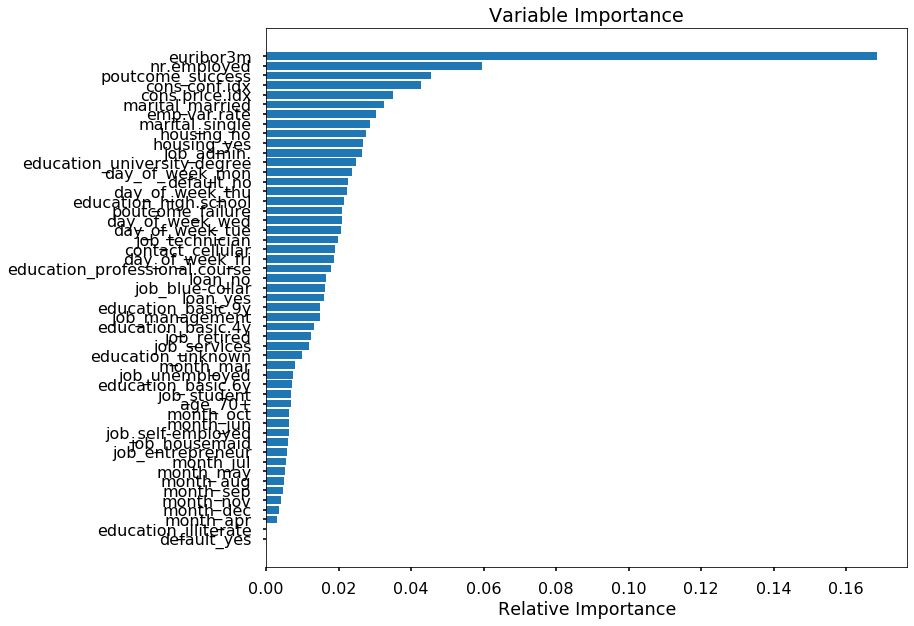

In [273]:
feature_cols = np.array(['age_70+', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'contact_cellular', 'poutcome_failure', 'poutcome_success', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'loan_no', 'loan_yes'])

clf = RandomForestClassifier()
clf.fit(test[feature_cols], test['y'])

importances = clf.feature_importances_
sorted_idx = np.argsort(importances)
padding = np.arange(len(feature_cols)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.style.use('seaborn-poster')
plt.tight_layout()
plt.savefig('features.jpg')
plt.show()

In [274]:
X_new = test.loc[:, feature_cols]
X_new.shape

(4119, 51)

In [275]:
new_pred_class = clf.predict(X_new)

x = pd.DataFrame({'id': test.id, 'y': new_pred_class}
             ).set_index('id').to_csv('decisionTree.csv')


new_pred_class

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [193]:
from sklearn.linear_model import LogisticRegression  # classification model
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
Y_pred = logreg.predict(X)
print('Correctly predicted on TRAINING SET: {}, errors:{}'.format(
    sum(Y == Y_pred), sum(Y != Y_pred)))

Correctly predicted on TRAINING SET: 37023, errors:4165


In [195]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y, Y_pred))
print('Accuracy on TRAINING set: {:.2f}'.format(accuracy_score(Y, Y_pred)))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     36548
         yes       0.65      0.23      0.34      4640

    accuracy                           0.90     41188
   macro avg       0.78      0.61      0.64     41188
weighted avg       0.88      0.90      0.88     41188

Accuracy on TRAINING set: 0.90
